# Risk-Parity Model Analysis

Analysis and Visualization of the results(calculated by python) with R

In [14]:
library(dplyr) # easier data wrangling 
library(viridis) # colour blind friendly palette, works in B&W also
library(Interpol.T) #  will generate a large dataset on initial load
library(lubridate) # for easy date manipulation
library(ggExtra) # because remembering ggplot theme options is beyond me
library(tidyr) 

library(ggplot2)
library(readxl)
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(Cairo)

# set current path as working directory
setwd("../Risk_Parity_Model")
options (warn = -1)

In [15]:
# input data
df_index <- read_excel('../../Data/Index.xls')
df_index <- na.omit(df_index)
m_index <- as.matrix(df_index[2:ncol(df_index)])

## 1. Correlation

Before creating the RP Model, we should analysis the correlation of different general asset. To make our allocation have a better performance, the correlation between general assets should not be too high, which may undermine the effect of risk diffusion.

The heatmap is used to display the correlation. And we can find most general assets have a low correlation with other assets except the China debt.

In [16]:
# correlation calculation
cor_index = cor(m_index)
recor_index = melt(cor_index)

png 
  2

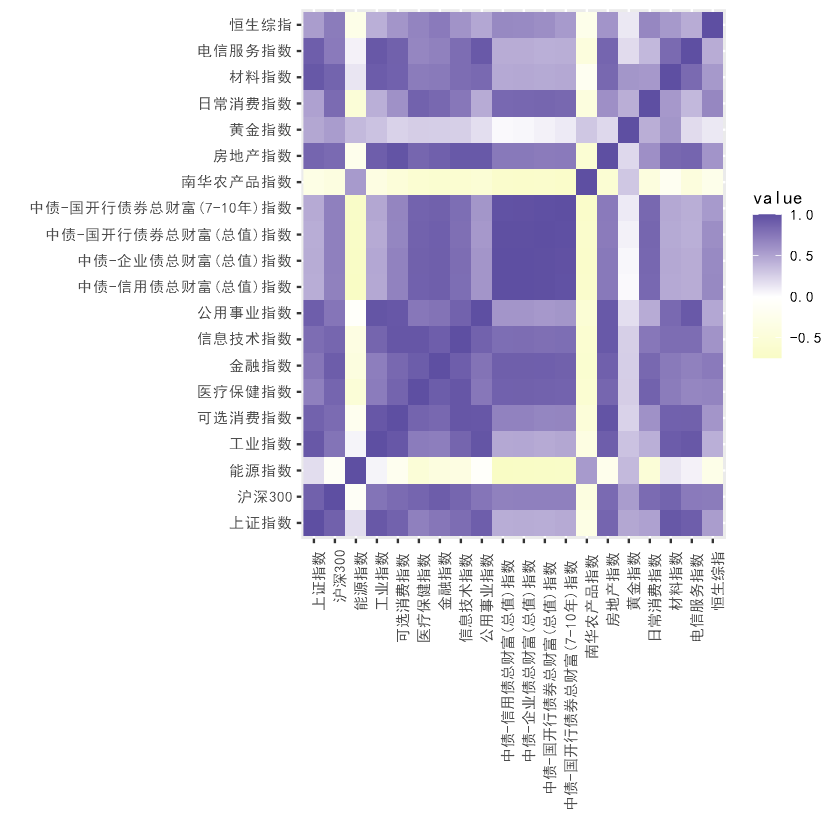

In [17]:
# correlation heatmap
CairoPDF("Heatmap_Cor_Asset.pdf",width = 7,height = 6)
ggplot(data = recor_index, aes(x=Var1, y=Var2, fill=value)) + 
    xlab("")+ ylab("") +
    scale_fill_gradient2(high = "#5E4FA2",mid="white",low="#F6FBB2")+
    theme(text=element_text(family="SimHei")) +
    theme(axis.text.x = element_text(angle = 90, vjust = 1, hjust = 1)) +
    geom_raster()
dev.off()

## 2. Position View Given by the Risk-Parity Model

## 3. Backtest for the Risk-Parity Model

In [17]:
# Create test matrix
test = matrix(rnorm(200), 20, 10)
test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3
test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2
test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4
colnames(test) = paste("Test", 1:10, sep = "")
rownames(test) = paste("Gene", 1:20, sep = "")

In [21]:
class(cor_index)

[1] "matrix"

In [4]:
df_index

ERROR: Error in df_index[[0]]: attempt to select less than one element in get1index <real>


In [94]:
cor(df_index)

ERROR: Error in cor(df_index): supply both 'x' and 'y' or a matrix-like 'x'


In [92]:
pheatmap(df_index,cluster_row = FALSE)

ERROR: Error in hclust(d, method = method): must have n >= 2 objects to cluster


Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Expecting date in A2677 / R2677C1: got '鏁版嵁鏉ユ簮锛歐ind'"


In [23]:
data2 <- data(Trentino_hourly_T,package = "Interpol.T")

names(h_d_t)[1:5]<- c("stationid","date","hour","temp","flag")
df <- tbl_df(h_d_t) %>%
  filter(stationid =="T0001")

In [24]:
df <- df %>% mutate(year = year(date),
                    month = month(date, label=TRUE),
                    day = day(date))

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."


In [2]:
df$date<-ymd(df$date) # not necessary for plot but 
#useful if you want to do further work with the data

#cleanup
rm(list=c("h_d_t","mo_bias","Tn","Tx",
          "Th_int_list","calibration_l",
          "calibration_shape","Tm_list"))


#create plotting df
df <-df %>% select(stationid,day,hour,month,year,temp)%>%
  fill(temp) #optional - see note below

# Re: use of fill
# This code is for demonstrating a visualisation technique
# There are 5 missing hourly values in the dataframe.

# see the original plot here (from my ggplot demo earlier this year) to see the white spaces where the missing values occcur:
# https://github.com/johnmackintosh/ggplotdemo/blob/master/temp8.png 

# I used 'fill' from  tidyr to take the prior value for each missing value and replace the NA
# This is a quick fix for the blog post only - _do not_ do this with your real world data

# Should really use either use replace_NA or complete(with fill)in tidyr 
# OR 
# Look into more specialist way of replacing these missing values -e.g. imputation.



statno <-unique(df$stationid)



######## Plotting starts here#####################
p <-ggplot(df,aes(day,hour,fill=temp))+
  geom_tile(color= "white",size=0.1) + 
  scale_fill_viridis(name="Hrly Temps C",option ="C")
p <-p + facet_grid(year~month)
p <-p + scale_y_continuous(trans = "reverse", breaks = unique(df$hour))
p <-p + scale_x_continuous(breaks =c(1,10,20,31))
p <-p + theme_minimal(base_size = 8)
p <-p + labs(title= paste("Hourly Temps - Station",statno), x="Day", y="Hour Commencing")
p <-p + theme(legend.position = "bottom")+
  theme(plot.title=element_text(size = 14))+
  theme(axis.text.y=element_text(size=6)) +
  theme(strip.background = element_rect(colour="white"))+
  theme(plot.title=element_text(hjust=0))+
  theme(axis.ticks=element_blank())+
  theme(axis.text=element_text(size=7))+
  theme(legend.title=element_text(size=8))+
  theme(legend.text=element_text(size=6))+
  removeGrid()#ggExtra

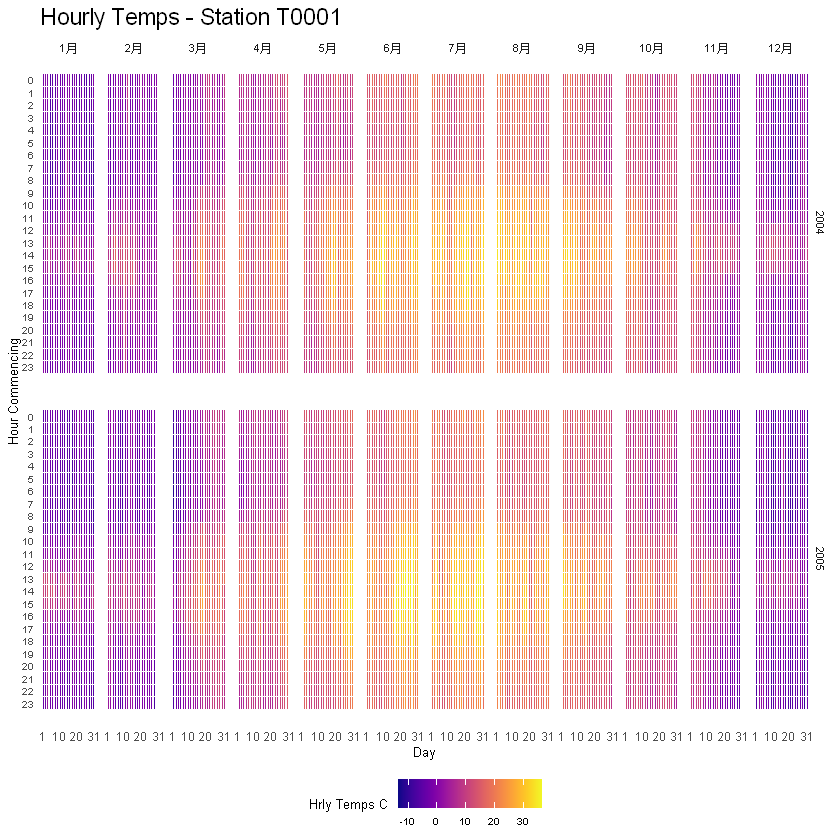

In [4]:
p